<a href="https://colab.research.google.com/github/Lauri-Litovuo/AI-Machine-Learning-Training/blob/main/Beginner01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Salary_dataset.csv to Salary_dataset.csv


In [4]:
#This time pandas is forbidden, you have to use only numpy
import numpy as np

In [72]:
# Read the data from the CSV file with read from Numpy

dtype=[
    ('YearsExperience', np.float32),
    ('Salary', np.float32)
]
data = np.genfromtxt("Salary_dataset.csv", delimiter=',', dtype=dtype, skip_header=1, usecols=[1,2])

print(data)

[( 1.2,  39344.) ( 1.4,  46206.) ( 1.6,  37732.) ( 2.1,  43526.)
 ( 2.3,  39892.) ( 3. ,  56643.) ( 3.1,  60151.) ( 3.3,  54446.)
 ( 3.3,  64446.) ( 3.8,  57190.) ( 4. ,  63219.) ( 4.1,  55795.)
 ( 4.1,  56958.) ( 4.2,  57082.) ( 4.6,  61112.) ( 5. ,  67939.)
 ( 5.2,  66030.) ( 5.4,  83089.) ( 6. ,  81364.) ( 6.1,  93941.)
 ( 6.9,  91739.) ( 7.2,  98274.) ( 8. , 101303.) ( 8.3, 113813.)
 ( 8.8, 109432.) ( 9.1, 105583.) ( 9.6, 116970.) ( 9.7, 112636.)
 (10.4, 122392.) (10.6, 121873.)]


In [75]:
# Separate the features (YearsExperience) from the target variable (Salary)
arr1=[]
arr2=[]

for yoe, salary in data:
  arr1.append(yoe)
  arr2.append(salary)

X = np.array(arr1)
y = np.array(arr2)

print(X, y)

[ 1.2  1.4  1.6  2.1  2.3  3.   3.1  3.3  3.3  3.8  4.   4.1  4.1  4.2
  4.6  5.   5.2  5.4  6.   6.1  6.9  7.2  8.   8.3  8.8  9.1  9.6  9.7
 10.4 10.6] [ 39344.  46206.  37732.  43526.  39892.  56643.  60151.  54446.  64446.
  57190.  63219.  55795.  56958.  57082.  61112.  67939.  66030.  83089.
  81364.  93941.  91739.  98274. 101303. 113813. 109432. 105583. 116970.
 112636. 122392. 121873.]


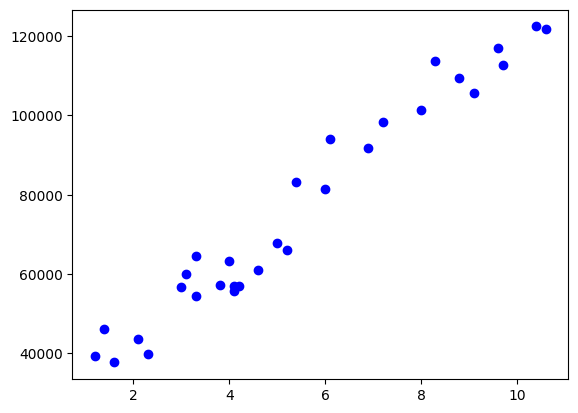

In [118]:
#This time seaborn is forbidden, you have to find a library that works with numpy
import matplotlib.pyplot as plt

#You have to reproduce this graph
plt.scatter(X, y, color='blue')
plt.show()

In [130]:
# Let's create a function that displays the point line with the bar.
def visualize(theta, X, y):
    plt.scatter(X, y, marker='o')
    plt.xlabel('YearsExperience')
    plt.ylabel('Salary')
    plt.title('Salary vs Experience')
    x_line = np.linspace(0, 12)
    y_pred = theta[1] * x_line + theta[0]
    plt.plot(x_line, y_pred)
    plt.xlim(0, 12)
    plt.ylim(-5000, 140000)
    plt.show()


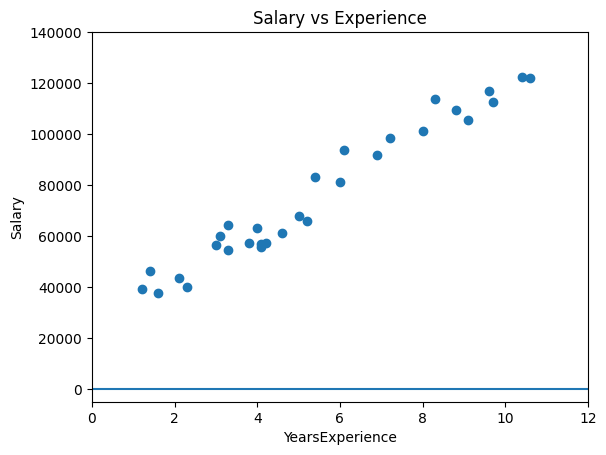

In [131]:
# Ok, let's test our function now, you should get a result comparable to this one
theta = np.zeros(2)
visualize(theta, X, y)

In [157]:
# Create a function that multiplies each element of the matrix X by the slope of the model (theta[1]),
#followed by the addition of the intercept of the model (theta[0]), thus producing the predictions of the simple linear regression model.

def predict(X, theta):
    prediction = theta[1] * X + theta[0]
    return prediction

In [158]:
def fit(X, y, theta, alpha, num_iters):
    # Initialize some useful variables
    m = X.shape[0] #size of X

    # Loop over the number of iterations
    for _ in range(num_iters):
        y_pred = predict(X, theta)
        D_theta1 = (-1/m) * sum(X * (y - y_pred)) #derivate value of m (slope)
        D_theta0 = (-1/m) * sum(y - y_pred) #derivate value of c (intercept of x-axis)
        theta[1] = theta[1] - alpha * D_theta1
        theta[0] = theta[0] - alpha *D_theta0

        # Perform one iteration of gradient descent (i.e., update theta once)
    return theta

In [159]:
# To begin, we'll set alpha to 0.01 and num_iters to 1000

theta = np.zeros(2)
finetuned_theta = fit(X, y, theta, 0.01, 1000)
print(finetuned_theta)

#You should have a result similar to this one: [21912.58918422329, 9880.814004608217]

[21912.59019141  9880.81372707]


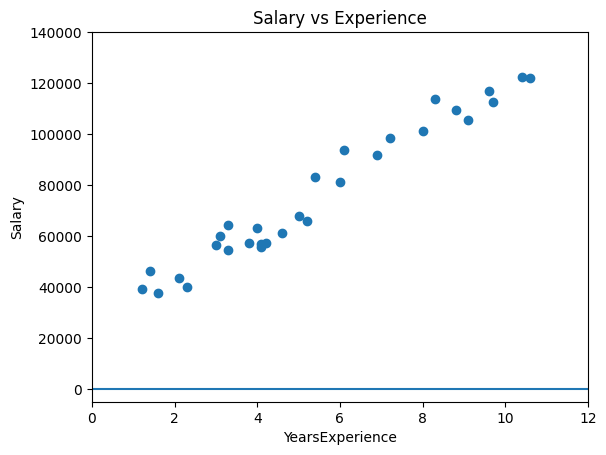

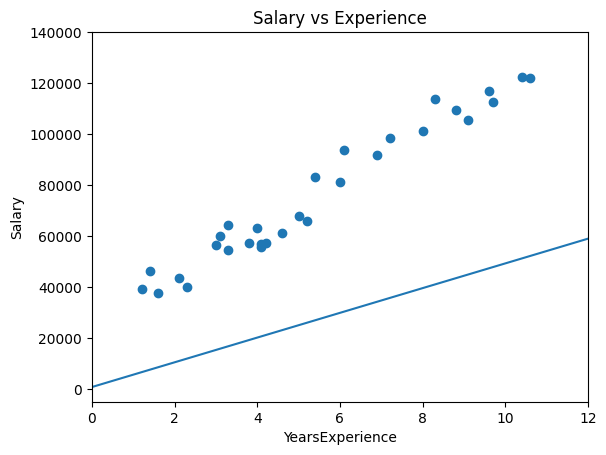

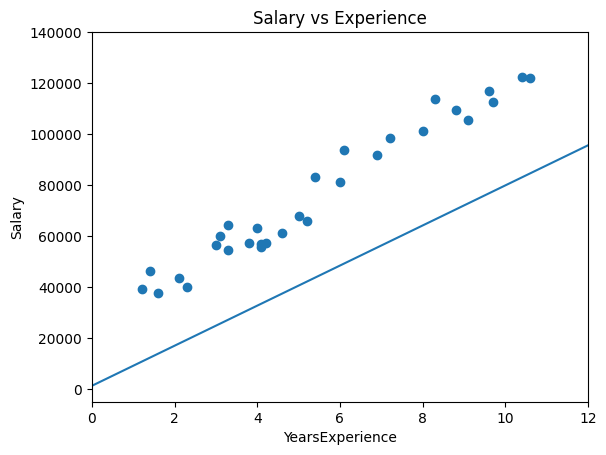

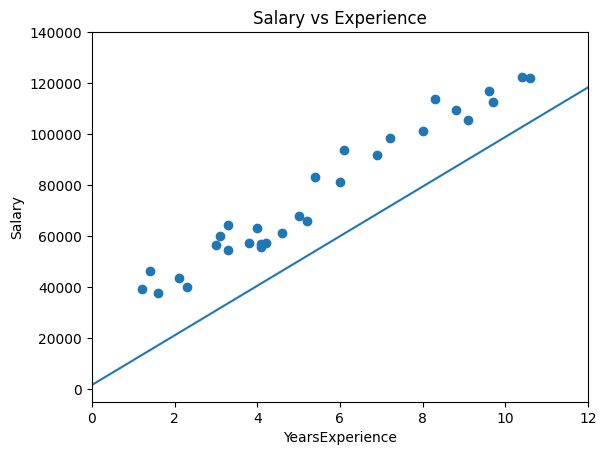

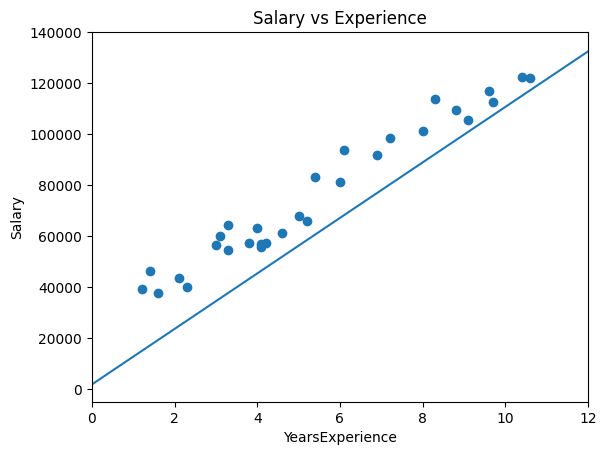

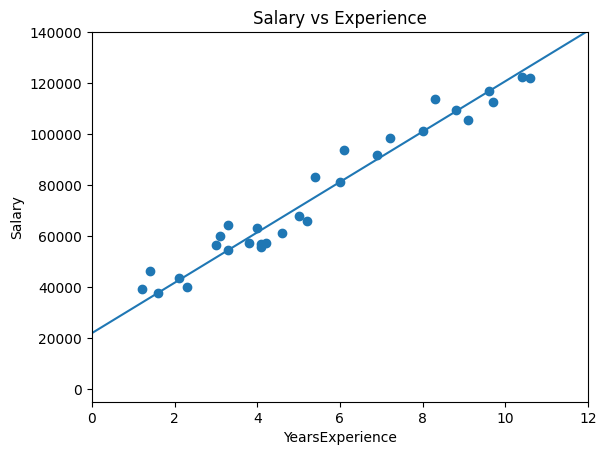

In [160]:
# Ok, let's test our function now, you should get a result comparable to this one
theta = np.zeros(2)
visualize(fit(X, y, theta, 0.01, 0), X, y)
theta = np.zeros(2)
visualize(fit(X, y, theta, 0.01, 1), X, y)
theta = np.zeros(2)
visualize(fit(X, y, theta, 0.01, 2), X, y)
theta = np.zeros(2)
visualize(fit(X, y, theta, 0.01, 3), X, y)
theta = np.zeros(2)
visualize(fit(X, y, theta, 0.01, 4), X, y)
theta = np.zeros(2)
visualize(fit(X, y, theta, 0.01, 1000), X, y)

In [161]:
def cost(X, y, theta):
    # Calculate the difference between model predictions and actual target values
    loss = y - predict(X, theta)

    # Calculate the squared sum of the loss and scale it by 1/(2 * number of samples)
    cost = sum(loss**2 * (1/(2*X.shape[0])))

    # Return the computed cost as a measure of model fit
    return cost


In [162]:
# Test it with theta = [0,0]. You should get approximately 3251553638.

cost_for_theta_zero = cost(X, y, [0, 0])
print(cost_for_theta_zero)

3251553838.0


In [167]:
def fit_with_cost(X, y, theta, alpha, num_iters):
    m = X.shape[0]  # Number of training examples
    J_history = []  # List to store cost values at each iteration

    # Loop over the specified number of iterations
    for itr in range(num_iters):
        # Calculate the loss (difference between predictions and actual values)
        loss = y - predict(X, theta)

        # Update the temporary values of theta for both coefficients using the gradient descent formula
        y_pred = predict(X, theta)
        D_theta1 = (-1/m) * sum(X * (y - y_pred)) #derivate value of m (slope)
        D_theta0 = (-1/m) * sum(y - y_pred) #derivate value of c (intercept of x-axis)
        theta[1] = theta[1] - alpha * D_theta1
        theta[0] = theta[0] - alpha *D_theta0

        # Calculate and append the cost for the current theta values to the history list
        cost = sum(loss**2 * (1/(2*X.shape[0])))
        J_history.append(cost)

        # Perform one iteration of gradient descent (update theta values)

    # Return the final theta values and the list of cost values over iterations
    return (theta, J_history)

In [168]:
# First, we initialize theta to zero
theta = np.zeros(2)

# Start the training using your new function
theta, J_history = fit_with_cost(X, y, theta, 0.001, 100)

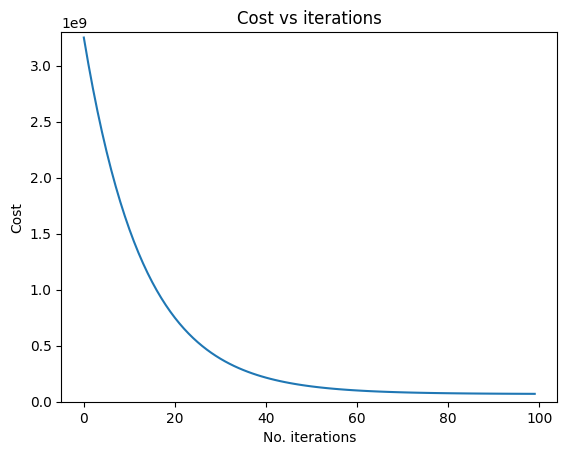

In [177]:
#You have to reproduce this graph

plt.plot(J_history)
plt.title('Cost vs iterations')
plt.ylabel('Cost')
plt.xlabel('No. iterations')
plt.ylim(0, 3.3e9)
plt.show()

In [182]:
# Years of experience of the person you want to predict the salary for
years_experience = 5

# Predict the salary
predicted_salary = predict(years_experience, theta)

# Display the predicted salary
print("Predicted salary for {} years of experience {}".format(years_experience, predicted_salary))

Predicted salary for 5 years of experience 64722.10124137118
